In [1]:
import os
import glob
import matplotlib

import scipy.io
import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import umap
import phate
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

from sklearn.decomposition import PCA

from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

#### Ground Truth

In [2]:
adh_vals = [0.00, 0.01, 0.05, 0.09, 0.13, 0.17, 0.21, 0.25]

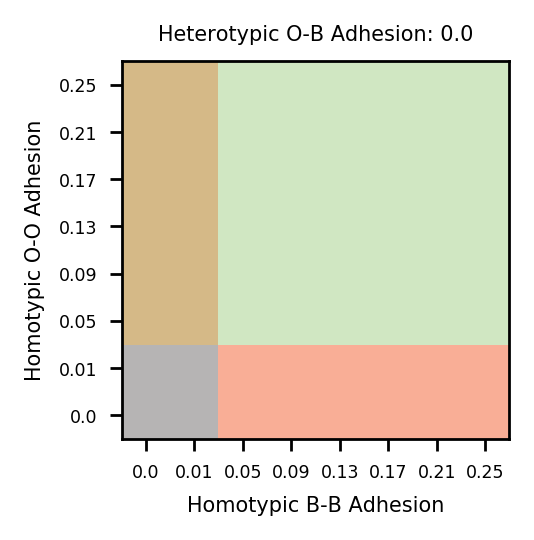

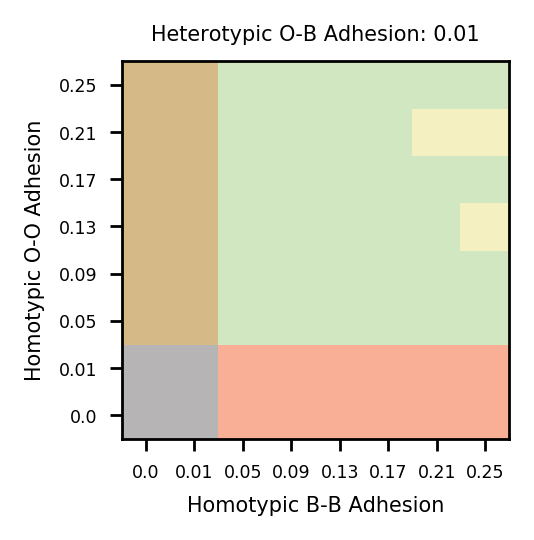

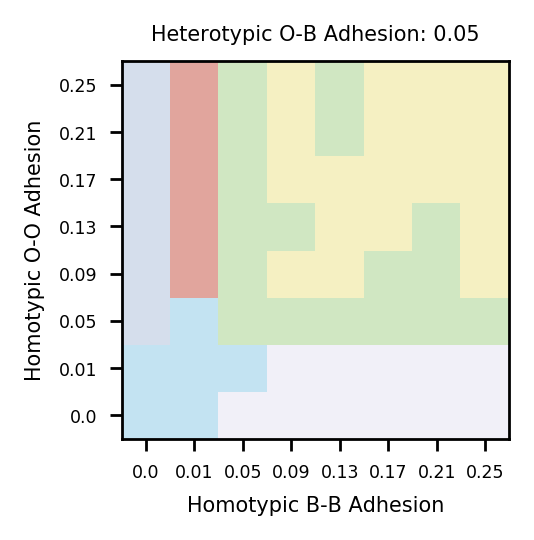

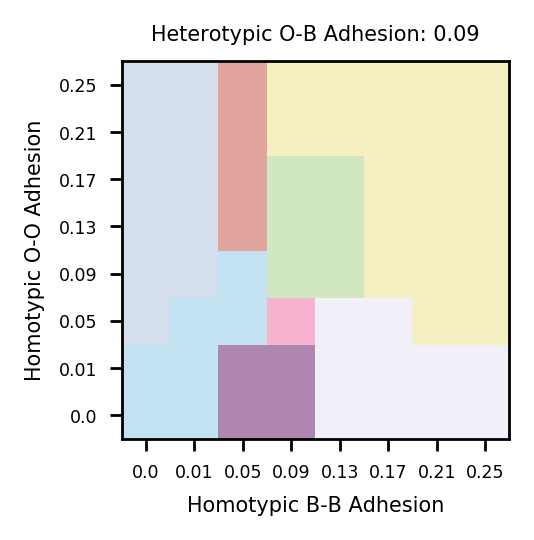

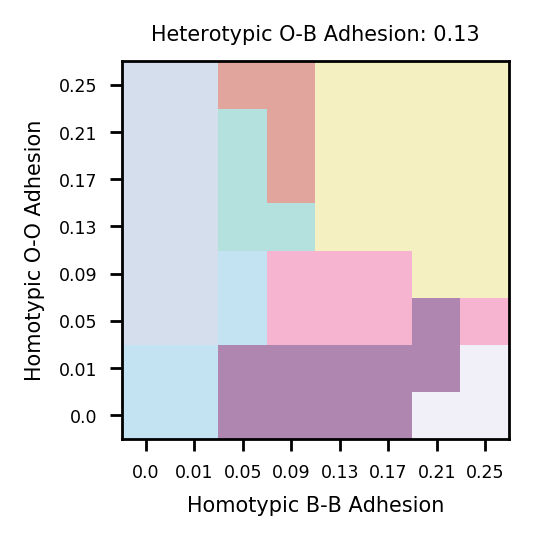

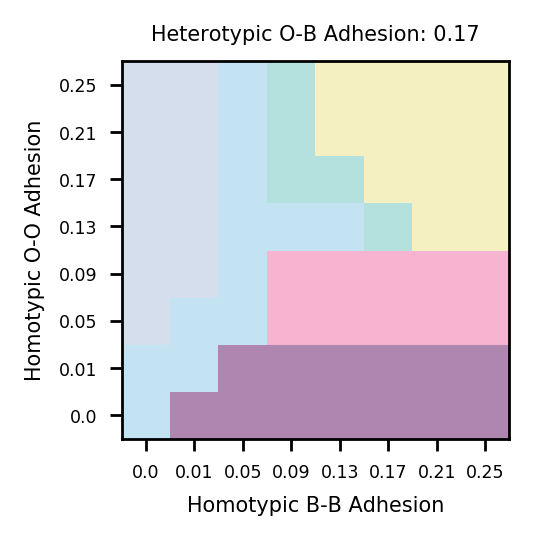

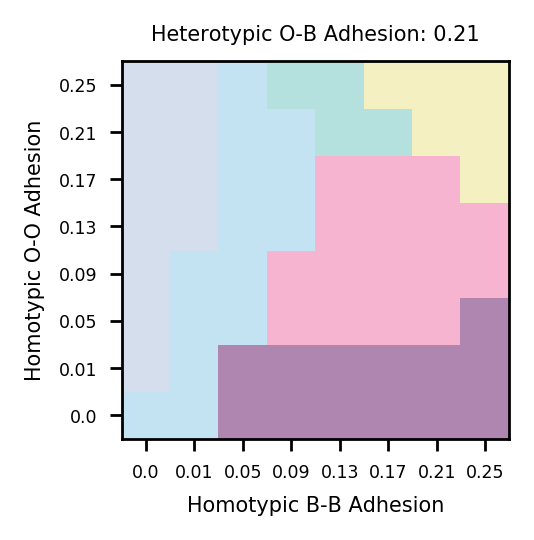

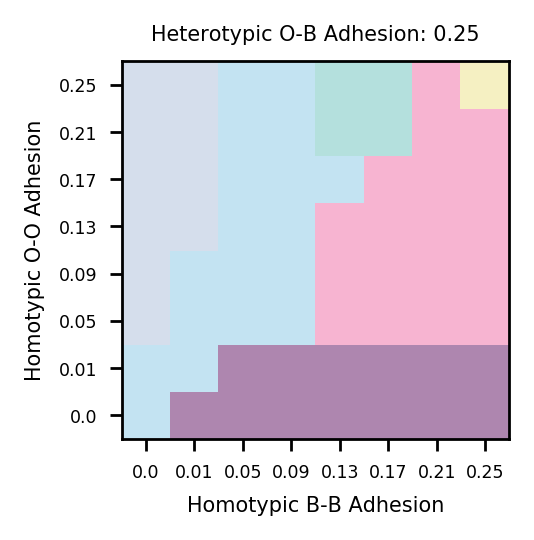

In [3]:
M1=[[0,0,1,1,1,1,1,1],[0,0,1,1,1,1,1,1],[2,2,3,3,3,3,3,3],[2,2,3,3,3,3,3,3],[2,2,3,3,3,3,3,3],
    [2,2,3,3,3,3,3,3],[2,2,3,3,3,3,3,3],[2,2,3,3,3,3,3,3]]
M2=[[0,0,1,1,1,1,1,1],[0,0,1,1,1,1,1,1],[2,2,3,3,3,3,3,3],[2,2,3,3,3,3,3,3],[2,2,3,3,3,3,3,4],
    [2,2,3,3,3,3,3,3],[2,2,3,3,3,3,4,4],[2,2,3,3,3,3,3,3]]
M3=[[6,6,7,7,7,7,7,7],[6,6,6,7,7,7,7,7],[9,6,3,3,3,3,3,3],[9,10,3,4,4,3,3,4],[9,10,3,3,4,4,3,4],
    [9,10,3,4,4,4,4,4],[9,10,3,4,3,4,4,4],[9,10,3,4,3,4,4,4]]
M4=[[6,6,12,12,7,7,7,7],[6,6,12,12,7,7,7,7],[9,6,6,11,7,7,4,4],[9,9,6,3,3,4,4,4],[9,9,10,3,3,4,4,4],
    [9,9,10,3,3,4,4,4],[9,9,10,4,4,4,4,4],[9,9,10,4,4,4,4,4]]
M5=[[6,6,12,12,12,12,7,7],[6,6,12,12,12,12,12,7],[9,9,6,11,11,11,12,11],[9,9,6,11,11,11,4,4],
    [9,9,13,13,4,4,4,4],[9,9,13,10,4,4,4,4],[9,9,13,10,4,4,4,4],[9,9,10,10,4,4,4,4]]
M6=[[6,12,12,12,12,12,12,12],[6,6,12,12,12,12,12,12],[9,6,6,11,11,11,11,11],[9,9,6,11,11,11,11,11],
    [9,9,6,6,6,13,4,4],[9,9,6,13,13,4,4,4],[9,9,6,13,4,4,4,4],[9,9,6,13,4,4,4,4]]
M7=[[6,6,12,12,12,12,12,12],[9,6,12,12,12,12,12,12],[9,6,6,11,11,11,11,12],[9,6,6,11,11,11,11,11],
    [9,9,6,6,11,11,11,11],[9,9,6,6,11,11,11,4],[9,9,6,6,13,13,4,4],[9,9,6,13,13,4,4,4]]
M8=[[6,12,12,12,12,12,12,12],[6,6,12,12,12,12,12,12],[9,6,6,6,11,11,11,11],[9,6,6,6,11,11,11,11],
    [9,9,6,6,11,11,11,11],[9,9,6,6,6,11,11,11],[9,9,6,6,13,13,11,11],[9,9,6,6,13,13,11,4]]

TrueM = np.asarray([M1,M2,M3,M4,M5,M6,M7,M8])

colors = {"#b6b4b4":0, "#f9ae96":1, "#d5b987":2, "#d0e7c2":3,"#f5f0c2":4, "mediumseagreen":5, "#c3e3f2":6, "#f1f0f8":7, "lightcoral":8, 
          "#d5deec":9, "#e1a59d":10, "#f7b4d1":11,"#ae86af":12, "#b4e0dd":13}

num2col = {v: k for k, v in colors.items()}

l_colors = sorted(colors, key=colors.get)

cMap = ListedColormap(l_colors)

for i in range(8):
    fig, ax = plt.subplots(figsize=(2,2), dpi=250)
    ax.pcolor(TrueM[i], cmap=cMap, vmin=0, vmax=len(colors)-1)
    plt.xlabel("Homotypic B-B Adhesion", fontsize=6)
    plt.ylabel("Homotypic O-O Adhesion", fontsize=6)
    plt.title("Heterotypic O-B Adhesion: " + repr(adh_vals[i]), fontsize=6)
    plt.xticks(np.linspace(0.5, 7.5, 8), adh_vals, fontsize=5)
    plt.yticks(np.linspace(0.5, 7.5, 8), adh_vals, fontsize=5)
    plt.show()

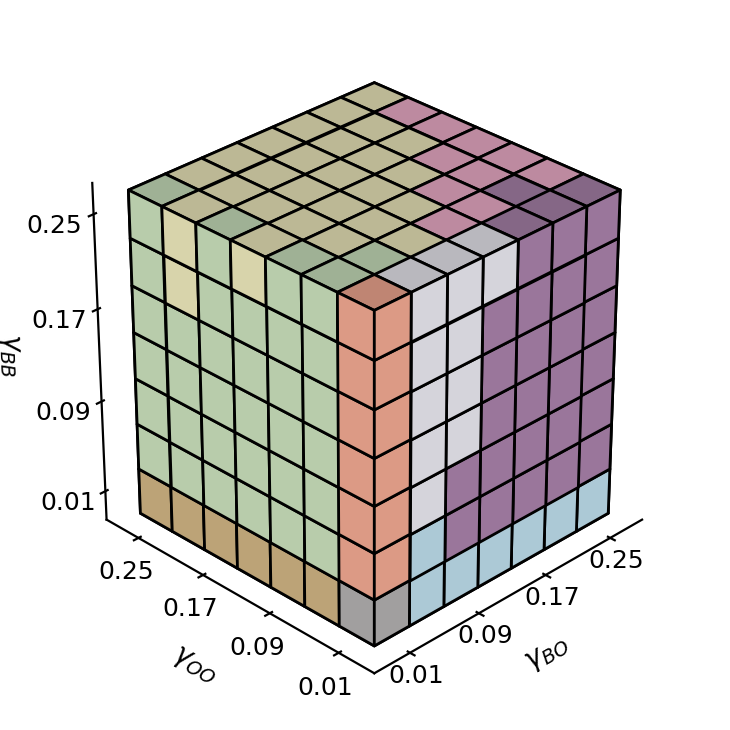

In [4]:
x,y,z = np.indices((7,7,7))
x = x + 1
y = y + 1
z = z + 1
pieces = [] 
for i in range(14):
    chunki = (TrueM[x,y,z] == i)
    pieces.append(chunki)
    
voxel = np.ones((7,7,7), dtype=bool)

colorsv = np.empty(voxel.shape, dtype=object)

for k in range(14):
    colorsv[pieces[k]] = num2col[k]

ax = plt.figure(figsize=(3,3), dpi=200, facecolor="none").add_subplot(projection='3d')
ax.voxels(voxel, facecolors=colorsv, edgecolor='k')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')

plt.xticks([0.5, 2.5, 4.5, 6.5], [0.01, 0.09, 0.17, 0.25], fontsize=9)
plt.yticks([0.5, 2.5, 4.5, 6.5], [0.01, 0.09, 0.17, 0.25], fontsize=9)

ax.set_zticks([0.5, 2.5, 4.5, 6.5])
ax.set_zticklabels([0.01, 0.09, 0.17, 0.25], fontsize=9)

ax.set_xlabel('$\gamma_{BO}$', fontsize=10, labelpad=-5)
ax.set_ylabel('$\gamma_{OO}$', fontsize=10, labelpad=-2)
ax.set_zlabel('$\gamma_{BB}$', fontsize=10, labelpad=0)

ax.tick_params(axis='x', pad=-5)
ax.tick_params(axis='y', pad=-2)
ax.tick_params(axis='z', pad=1)

ax.grid(False)

# 45, 90+45
ax.view_init(azim=180+45)

plt.tight_layout()
plt.subplots_adjust(left=-0.2)
plt.subplots_adjust(bottom=-0.2)

plt.show()

#### Sliced View

- Reference: https://www.mathworks.com/help/matlab/ref/slice.html

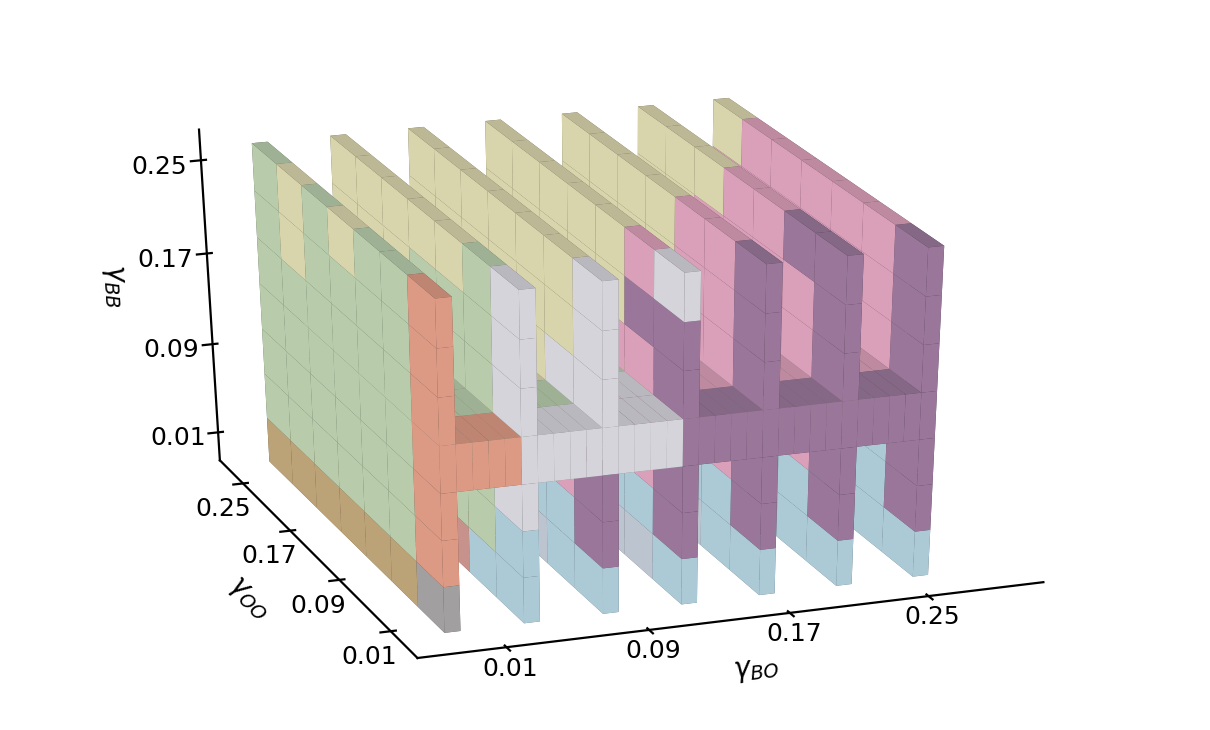

In [5]:
x,y,z = np.indices((7,7,7))
x = x + 1
y = y + 1
z = z + 1
pieces = [] 

for i in range(14):
    chunki = (TrueM[x,y,z] == i)
    spacedchunk = np.zeros((35,7,7), np.bool)
    for j in range(7):
        spacedchunk[5*j,:,:] = chunki[j,:,:]
        if(j != 6):
            spacedchunk[5*j+1:5*(j+1),:,3] = chunki[j,:,3]
    pieces.append(spacedchunk)

voxel = (sum(pieces) > 0)

colorsv = np.empty(voxel.shape, dtype=object)

for k in range(14):
    colorsv[pieces[k]] = num2col[k]

ax = plt.figure(figsize=(5,3), dpi=200, facecolor="none").add_subplot(projection='3d')
ax.voxels(voxel, facecolors=colorsv, edgecolor='none')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')

plt.xticks([3,12, 21, 30], [0.01, 0.09, 0.17, 0.25], fontsize=9)
plt.yticks([0.5, 2.5, 4.5, 6.5], [0.01, 0.09, 0.17, 0.25], fontsize=9)

ax.set_zticks([0.5, 2.5, 4.5, 6.5])
ax.set_zticklabels([0.01, 0.09, 0.17, 0.25], fontsize=9)

ax.set_xlabel('$\gamma_{BO}$', fontsize=10, labelpad=-5)
ax.set_ylabel('$\gamma_{OO}$', fontsize=10, labelpad=-2)
ax.set_zlabel('$\gamma_{BB}$', fontsize=10, labelpad=0)

ax.tick_params(axis='x', pad=-5)
ax.tick_params(axis='y', pad=-2)
ax.tick_params(axis='z', pad=1)

ax.grid(False)

# 45, 90+45
ax.view_init(azim=180+70)

plt.tight_layout()
plt.subplots_adjust(left=-0.2)
plt.subplots_adjust(bottom=-0.2)

plt.show()

#### Helper Functions

In [6]:
def idx2sim(i, j, k):
    
    # i: Adhesion B-B
    # j: Adhesion O-O
    # k: Adhesion B-O

    return 1 + i + 8*j + 64*k

def idx2param(i, j, k):

    a_vals = [0.00, 0.01, 0.05, 0.09, 0.13, 0.17, 0.21, 0.25]
    
    return (a_vals[i], a_vals[j], a_vals[k])

def param2idx(BB, OO, OB):
    
    a_vals = [0.00, 0.01, 0.05, 0.09, 0.13, 0.17, 0.21, 0.25]
    
    BB_idx = -1
    OO_idx = -1
    OB_idx = -1
    
    cnt = 0
    for adh in a_vals:
        
        if np.isclose(BB, adh):
            BB_idx = cnt
        
        if np.isclose(OO, adh):
            OO_idx = cnt
            
        if np.isclose(OB, adh):
            OB_idx = cnt
        
        cnt += 1
        
    return (BB_idx, OO_idx, OB_idx)

In [7]:
def get_npy_data_img(listfoldertypes, numsims, timestep, dimension, dimensionreduction):
    
    totalfiles = len(listfoldertypes)*numsims;
    dimstring = "H" + str(dimension)
    listofnparrayg = []
    listofnparrayr = []
    listofnparraygr = []
    listofadhvals = []
    
    for val in listfoldertypes:
        
        for i in range(1, numsims+1):
            
            filepath = val + os.sep + 'ParamSweep_' + str(i) + '_Output_persimg_serialize' + os.sep + str(timestep).zfill(7) + ".npy"            
            singlefile = np.load(filepath, allow_pickle = True).item()
            
            dimdatag = singlefile[dimstring][0]
            dimdatag = np.nan_to_num(dimdatag)
            dimdatar = singlefile[dimstring][1]
            dimdatar = np.nan_to_num(dimdatar)
            dimdatagr = singlefile[dimstring][2]
            dimdatagr = np.nan_to_num(dimdatagr)
            listofnparrayg.append(dimdatag)
            listofnparrayr.append(dimdatar)
            listofnparraygr.append(dimdatagr)
            
            param_file = "../simdata/mat_files/ParamSweep_" + str(i) + ".mat"
            mat_data = scipy.io.loadmat(param_file)
            RR = np.round(mat_data['RR'][0][0], 2)
            GG = np.round(mat_data['GG'][0][0], 2)
            RG = np.round(mat_data['RG'][0][0], 2)
            (RR_idx, GG_idx, RG_idx) = param2idx(RR, GG, RG)
            col_idx = TrueM[RG_idx][RR_idx][GG_idx]
            col = num2col[col_idx]
            # Assume: green = blue, red = orange
            listofadhvals.append((RR, GG, RG, RR_idx, GG_idx, RG_idx, col))
            
    if (dimensionreduction == "pca"):
        
        listofnparrayg = perform_pca(listofnparrayg)
        listofnparrayr = perform_pca(listofnparrayr)
        listofnparraygr = perform_pca(listofnparraygr)
        
    elif(dimensionreduction == "tsne"):
        
        listofnparrayg = perform_tsne(listofnparrayg)
        listofnparrayr = perform_tsne(listofnparrayr)
        listofnparraygr = perform_tsne(listofnparraygr)
        
    elif (dimensionreduction == "mds"):
        
        listofnparrayg = perform_mds(listofnparrayg)
        listofnparrayr = perform_mds(listofnparrayr)
        listofnparraygr = perform_mds(listofnparraygr)
        
    fulldimdata = np.hstack((listofnparrayg,listofnparrayr))
    fulldimdata = np.hstack((fulldimdata,listofnparraygr))

    return (np.array(fulldimdata), listofadhvals)


def get_npy_data_curve(listfoldertypes, numsims, timestep, dimension, dimensionreduction):
    
    totalfiles = len(listfoldertypes)*numsims;
    dimstring = "H" + str(dimension)
    listofnparrayg = []
    listofnparrayr = []
    listofnparraygr = []
    listofadhvals = []
    
    for val in listfoldertypes:
        
        for i in range(1, numsims+1):
            
            filepath = val + os.sep + 'ParamSweep_' + str(i) + '_Output_perscurve_serialize' + os.sep + str(timestep).zfill(7) + ".npy"
            singlefile = np.load(filepath, allow_pickle = True).item()
            
            dimdatag = singlefile[dimstring][0]
            dimdatag = np.nan_to_num(dimdatag)
            dimdatar = singlefile[dimstring][1]
            dimdatar = np.nan_to_num(dimdatar)
            dimdatagr = singlefile[dimstring][2]
            dimdatagr = np.nan_to_num(dimdatagr)
            listofnparrayg.append(dimdatag)
            listofnparrayr.append(dimdatar)
            listofnparraygr.append(dimdatagr)
            
            param_file = "../simdata/mat_files/ParamSweep_" + str(i) + ".mat"
            mat_data = scipy.io.loadmat(param_file)
            RR = np.round(mat_data['RR'][0][0], 2)
            GG = np.round(mat_data['GG'][0][0], 2)
            RG = np.round(mat_data['RG'][0][0], 2)
            (RR_idx, GG_idx, RG_idx) = param2idx(RR, GG, RG)
            col_idx = TrueM[RG_idx][RR_idx][GG_idx]
            col = num2col[col_idx]
            # Assume: green = blue, red = orange
            listofadhvals.append((RR, GG, RG, RR_idx, GG_idx, RG_idx, col))
            
    if (dimensionreduction == "pca"):
        
        listofnparrayg = perform_pca(listofnparrayg)
        listofnparrayr = perform_pca(listofnparrayr)
        listofnparraygr = perform_pca(listofnparraygr)
        
    elif (dimensionreduction == "tsne"):
        
        listofnparrayg = perform_tsne(listofnparrayg)
        listofnparrayr = perform_tsne(listofnparrayr)
        listofnparraygr = perform_tsne(listofnparraygr)
        
    elif (dimensionreduction == "mds"):
        
        listofnparrayg = perform_mds(listofnparrayg)
        listofnparrayr = perform_mds(listofnparrayr)
        listofnparraygr = perform_mds(listofnparraygr)
        
    fulldimdata = np.hstack((listofnparrayg, listofnparrayr))
    fulldimdata = np.hstack((fulldimdata, listofnparraygr))

    return (np.array(fulldimdata), listofadhvals)
    
        
def unison_shuffled_copies(listoflistshuffled):
    
    p = np.random.permutation(len(listoflistshuffled[0]))
    shuffledlist = []
    
    for val in listoflistshuffled:
        shuffled = val[p]
        shuffledlist.append(shuffled)
        
    return shuffledlist 


def kmeansclust(h0data, h1data, h2data, useh0, useh1, useh2):
    
    if(useh0):
        kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
        pred_y = kmeans.fit_predict(h0data)
        return pred_y
    
    elif(useh1):
        kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
        pred_y = kmeans.fit_predict(h1data) 
        return pred_y
    
    elif(useh2):
        kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
        pred_y = kmeans.fit_predict(h2data) 
        return pred_y

    
def opticsclust(homology_dat):
    
    clusterf = OPTICS(min_samples=4, metric='euclidean').fit(homology_dat)
    return clusterf.labels_
    
    
def dbscanclust(homology_dat):
    
    clusters = DBSCAN(eps=1.36, min_samples=4).fit(homology_dat)
    return clusters.labels_


def perform_pca(datatochange):
    
    x = StandardScaler().fit_transform(datatochange)
    pca = PCA(n_components=5, svd_solver="auto")
    principalComponents = pca.fit_transform(x)
    return principalComponents


def perform_tsne(datatochange):
    
    X_embedded = TSNE(n_components=3).fit_transform(datatochange)
    return X_embedded;


def perform_mds(datatochange):
    
    embedding = MDS(n_components=10)
    X_transformed = embedding.fit_transform(datatochange)
    return X_transformed

In [8]:
def dim_reduction_plot(X_coords, Y_coords, C_grnd_truth, C_hetero, C_homo_OO, C_homo_BB, title):
    
    plt.figure(figsize=(2,2), dpi=250)
    plt.scatter(X_coords, Y_coords, s=10, c=C_grnd_truth, edgecolors='gray', linewidth=0.1)
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()
    ax.set_facecolor((0.4, 0.4, 0.4))
    plt.xlabel(title + " 1", fontsize=7)
    plt.ylabel(title + " 2", fontsize=7)
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(15,3), dpi=500)

    p1 = axes[0].scatter(X_coords, Y_coords, s=15, c=C_hetero, edgecolors='gray', linewidth=0.1, cmap="Reds")
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_facecolor((0.6, 0.6, 0.6))
    axes[0].set_title(r"$\gamma_{BO}$", fontsize=15)
    fig.colorbar(p1, ax=axes[0])

    p2 = axes[1].scatter(X_coords, Y_coords, s=15, c=C_homo_OO, edgecolors='gray', linewidth=0.1, cmap="Reds")
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_facecolor((0.6, 0.6, 0.6))
    axes[1].set_title(r"$\gamma_{OO}$", fontsize=15)
    fig.colorbar(p2, ax=axes[1])

    p3 = axes[2].scatter(X_coords, Y_coords, s=15, c=C_homo_BB, edgecolors='gray', linewidth=0.1, cmap="Reds")
    axes[2].set_xticks([])
    axes[2].set_yticks([])
    axes[2].set_facecolor((0.6, 0.6, 0.6))
    axes[2].set_title(r"$\gamma_{BB}$", fontsize=15)
    fig.colorbar(p3, ax=axes[2])

    plt.show()

#### Load Data

In [9]:
sim_id = 120

filepath = 'persimg/ParamSweep_' + str(sim_id) + '_Output_persimg_serialize/5000000.npy' 
pimg = np.load(filepath,allow_pickle = True).item()

print("\nPersistence Images:")
print(np.shape(pimg['H0']))
print(np.shape(pimg['H1']))
print(np.shape(pimg['H2']))

filepath = 'perscurve/ParamSweep_' + str(sim_id) + '_Output_perscurve_serialize/5000000.npy' 
pcur = np.load(filepath,allow_pickle = True).item()

print("\nPersistence Curves:")
print(np.shape(pcur['H0']))
print(np.shape(pcur['H1']))
print(np.shape(pcur['H2']))

filepath = 'orderparamnpy/ParamSweep_' + str(sim_id) + '_Output_OP_serialize/AngDist.npy' 
opang = np.load(filepath,allow_pickle = True).item()

print("\nAngular Distribution:")
print(np.shape(opang['red']))
print(np.shape(opang['green']))
print(np.shape(opang['all']))

filepath = 'orderparamnpy/ParamSweep_' + str(sim_id) + '_Output_OP_serialize/RadDist.npy' 
oprad = np.load(filepath,allow_pickle = True).item()

print("\nHomotypic Radial Distribution:")
print(np.shape(oprad['homotypic_red']))
print(np.shape(oprad['homotypic_green']))
print(np.shape(oprad['homotypic_all']))

print("\nHeterotypic Radial Distribution:")
print(np.shape(oprad['heterotypic_red']))
print(np.shape(oprad['heterotypic_green']))
print(np.shape(oprad['heterotypic_all']))


Persistence Images:
(3, 100)
(3, 5000)
(3, 5000)

Persistence Curves:
(3, 200)
(3, 200)
(3, 200)

Angular Distribution:
(100,)
(100,)
(100,)

Homotypic Radial Distribution:
(100,)
(100,)
(100,)

Heterotypic Radial Distribution:
(100,)
(100,)
(100,)


In [10]:
# persimg
(vec_imgs_dim0, param_vals_0) = get_npy_data_img(["persimg"], 512, 5000000, 0, "")
(vec_imgs_dim1, param_vals_1) = get_npy_data_img(["persimg"], 512, 5000000, 1, "")
vec_imgs = np.hstack((vec_imgs_dim0, vec_imgs_dim1))

# perscurve
#(vec_imgs_dim0, param_vals_0) = get_npy_data_curve(["perscurve"], 512, 5000000, 0, "")
#(vec_imgs_dim1, param_vals_1) = get_npy_data_curve(["perscurve"], 512, 5000000, 1, "")
#vec_imgs = np.hstack((vec_imgs_dim0, vec_imgs_dim1))

H0_grnd_truth = [tmp[6] for tmp in param_vals_0]
H0_hetero_adh = [tmp[2] for tmp in param_vals_0]
H0_homo_adh_OO = [tmp[0] for tmp in param_vals_0]
H0_homo_adh_BB = [tmp[1] for tmp in param_vals_0]

H1_grnd_truth = [tmp[6] for tmp in param_vals_1]

H1_hetero_adh = [tmp[2] for tmp in param_vals_1]
H1_homo_adh_OO = [tmp[0] for tmp in param_vals_1]
H1_homo_adh_BB = [tmp[1] for tmp in param_vals_1]

#### UMAP

In [11]:
H0_umap = umap.UMAP(n_neighbors=5, random_state=42).fit(vec_imgs_dim0)
H1_umap = umap.UMAP(n_neighbors=5, random_state=42).fit(vec_imgs_dim1)
H01_umap = umap.UMAP(n_neighbors=5, random_state=42).fit(vec_imgs)

/home/labmember/anaconda2/envs/py36/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components
/home/labmember/anaconda2/envs/py36/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/home/labmember/anaconda2/envs/py36/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


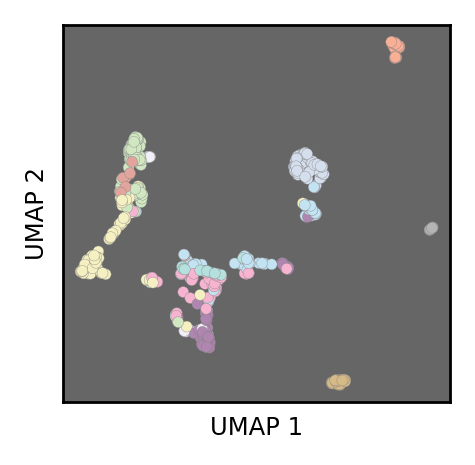

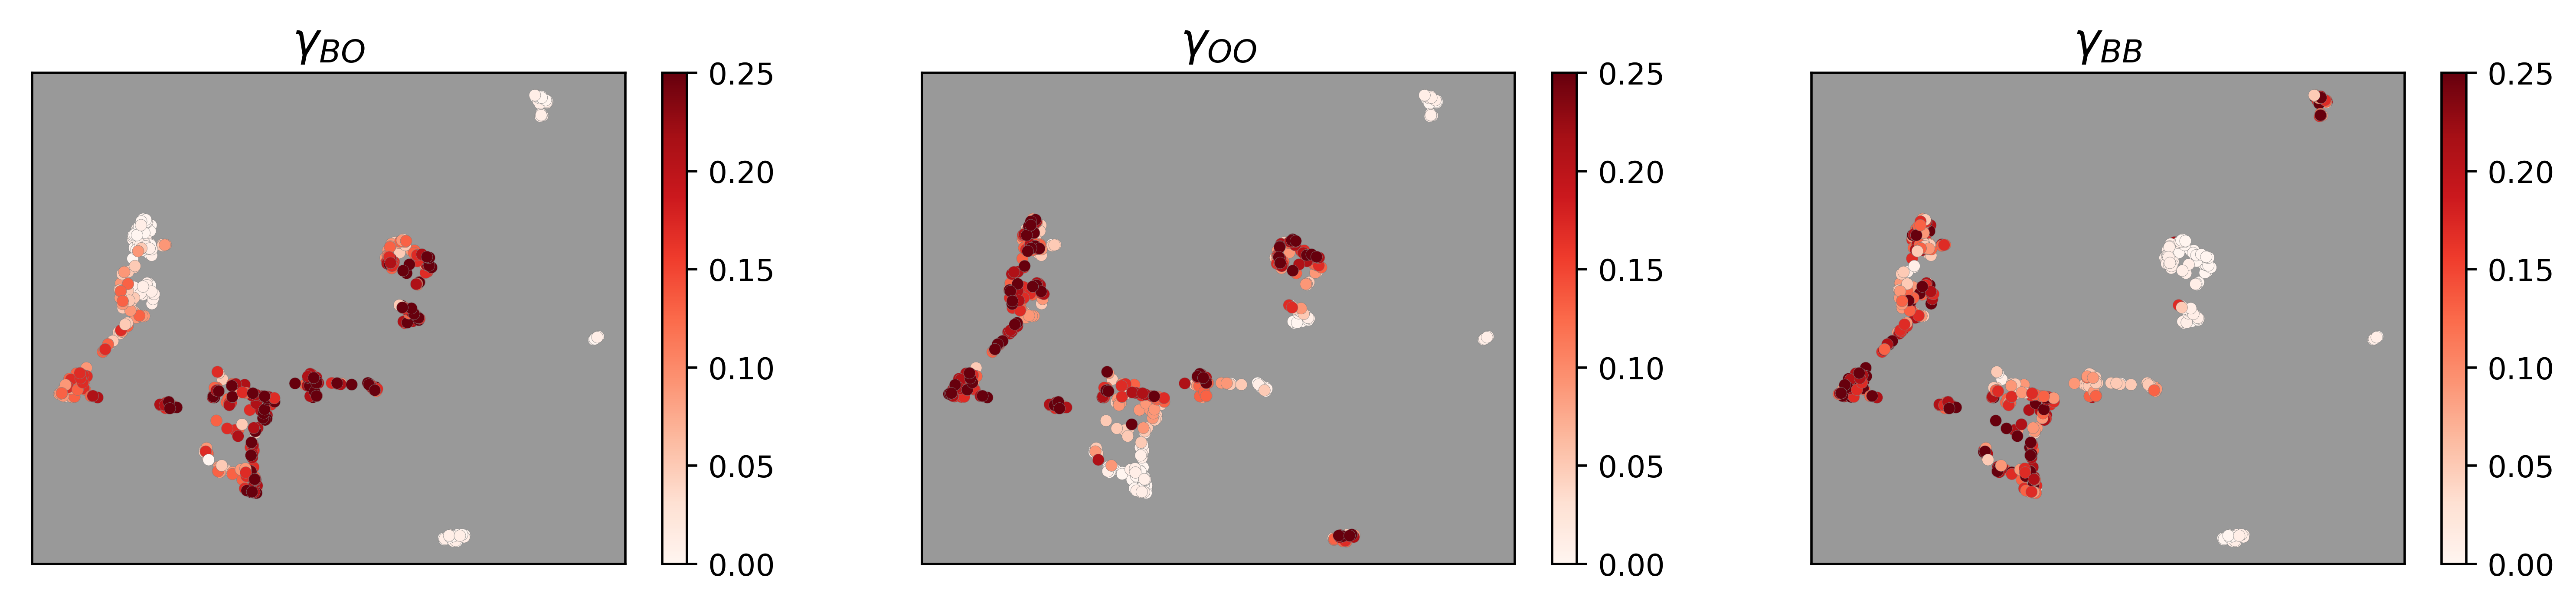

In [12]:
dim_reduction_plot(H0_umap.embedding_[:, 0], H0_umap.embedding_[:, 1], H0_grnd_truth, 
                   H0_hetero_adh, H0_homo_adh_OO, H0_homo_adh_BB, "UMAP")

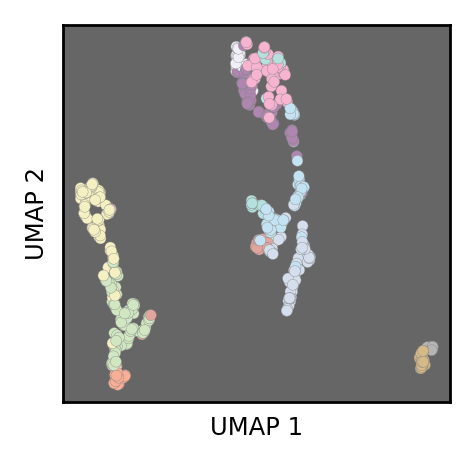

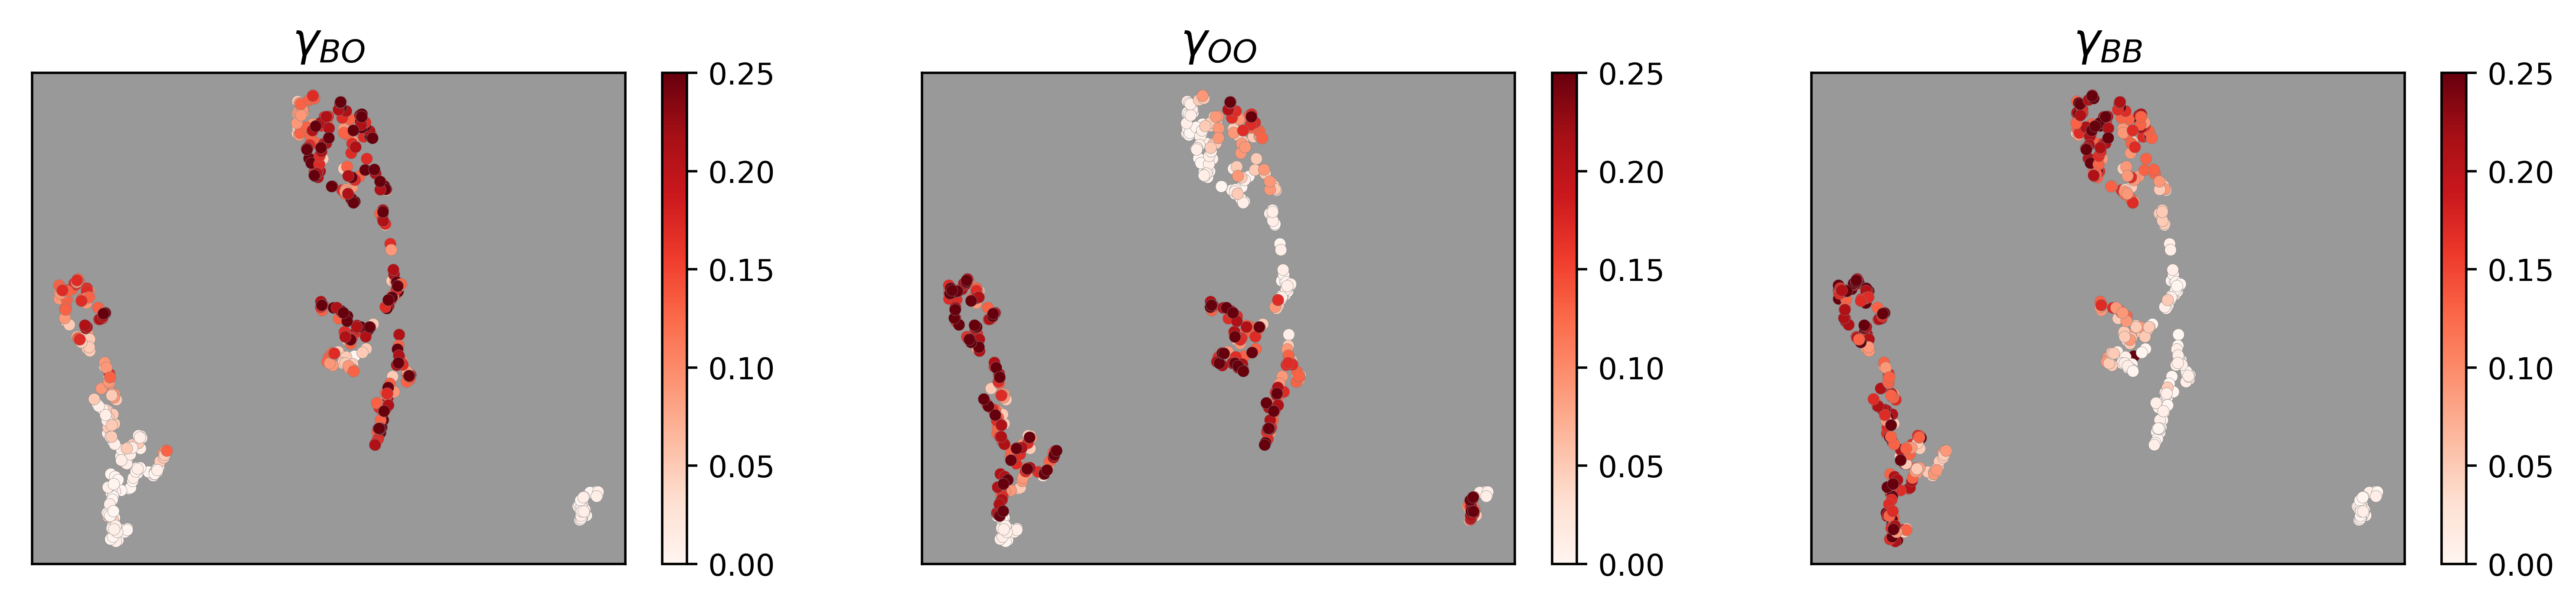

In [13]:
dim_reduction_plot(H1_umap.embedding_[:, 0], H1_umap.embedding_[:, 1], H1_grnd_truth, 
                   H1_hetero_adh, H1_homo_adh_OO, H1_homo_adh_BB, "UMAP")

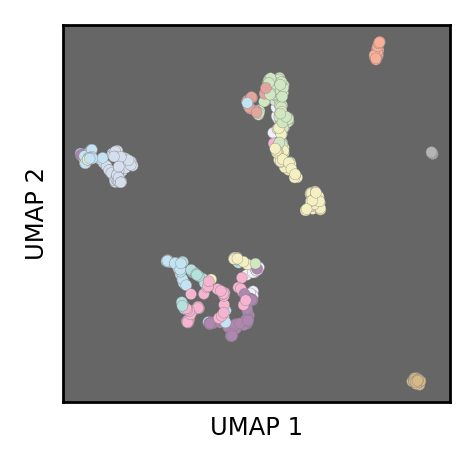

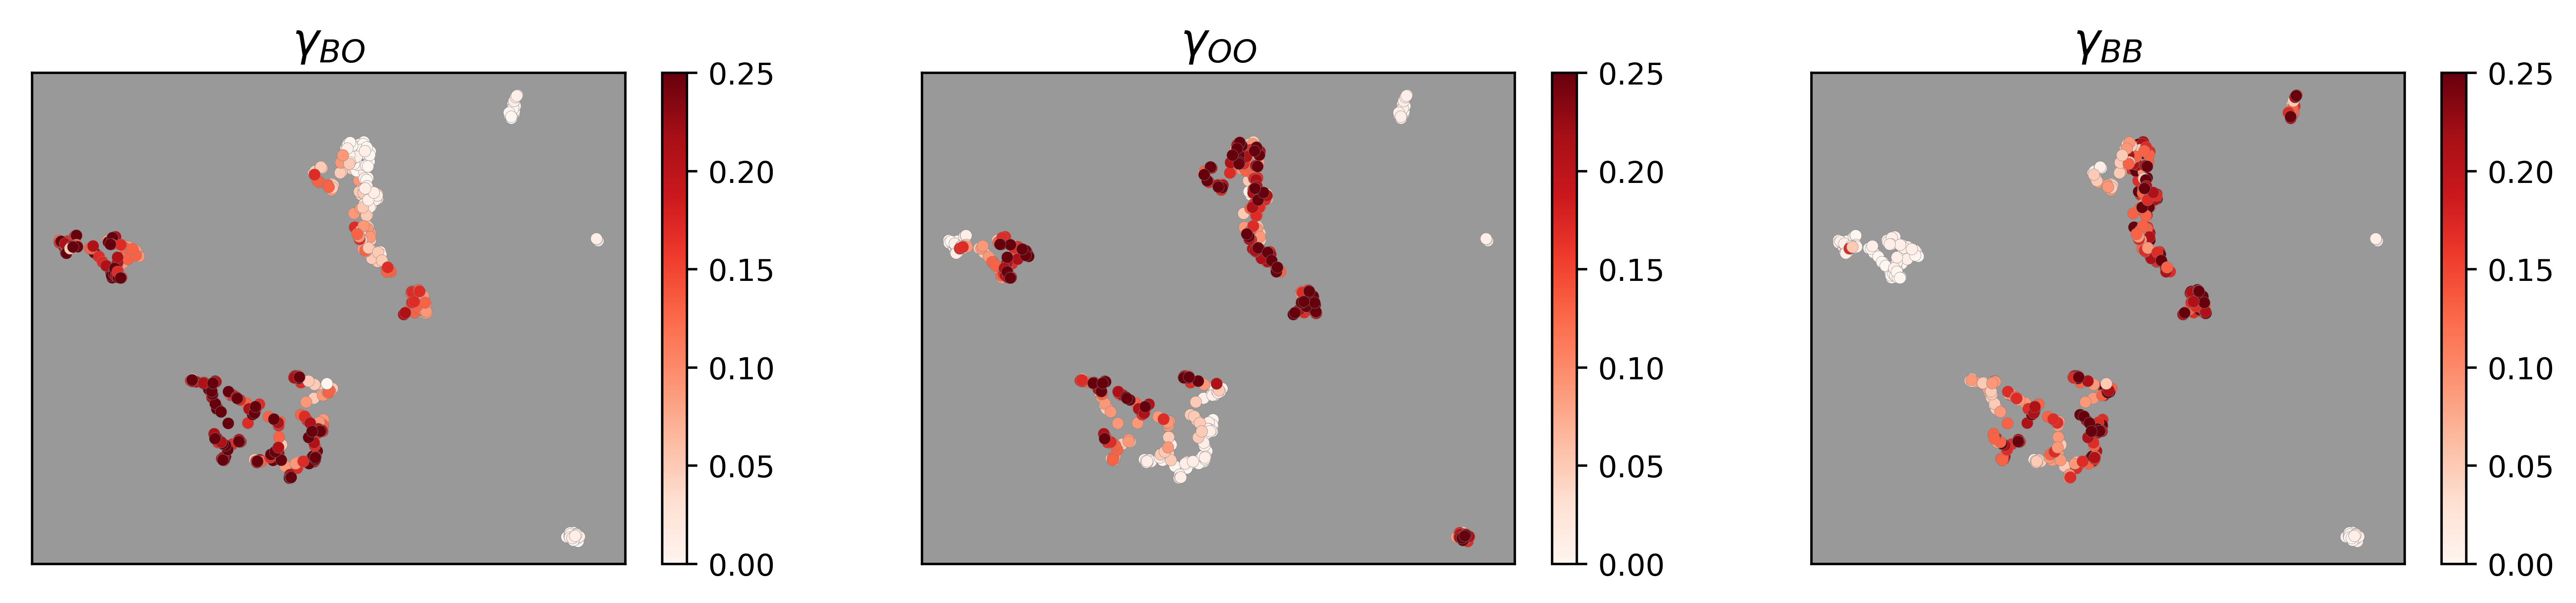

In [14]:
dim_reduction_plot(H01_umap.embedding_[:, 0], H01_umap.embedding_[:, 1], H0_grnd_truth, 
                   H0_hetero_adh, H0_homo_adh_OO, H0_homo_adh_BB, "UMAP")

#### PHATE

In [15]:
phate_operator = phate.PHATE(n_jobs=-2)
H0_phate = phate_operator.fit_transform(vec_imgs_dim0)
H1_phate = phate_operator.fit_transform(vec_imgs_dim1)
H01_phate = phate_operator.fit_transform(vec_imgs)

Calculating PHATE...
  Running PHATE on 512 observations and 300 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.02 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.12 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.15 seconds.
  Calculating optimal t...
    Automatically selected t = 18
  Calculated optimal t in 0.06 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...


/home/labmember/anaconda2/envs/py36/lib/python3.6/site-packages/graphtools/graphs.py:284: RuntimeWarning: Detected zero distance between samples 165 and 341. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


  Calculated metric MDS in 0.19 seconds.
Calculated PHATE in 0.43 seconds.
Calculating PHATE...
  Running PHATE on 512 observations and 15000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.42 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 0.64 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 0.06 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.19 seconds.
Calculated PHATE in 0.92 seconds.
Calculating PHATE...
  Running PHATE on 512 observations and 15300 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.44 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10

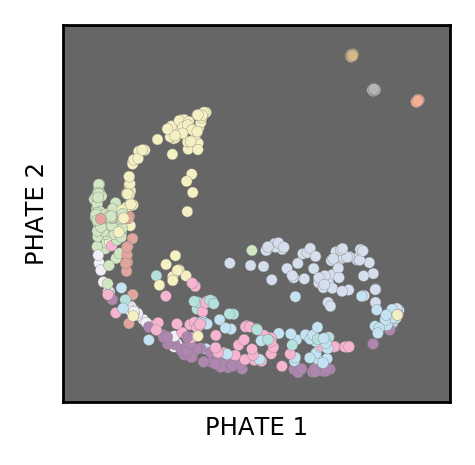

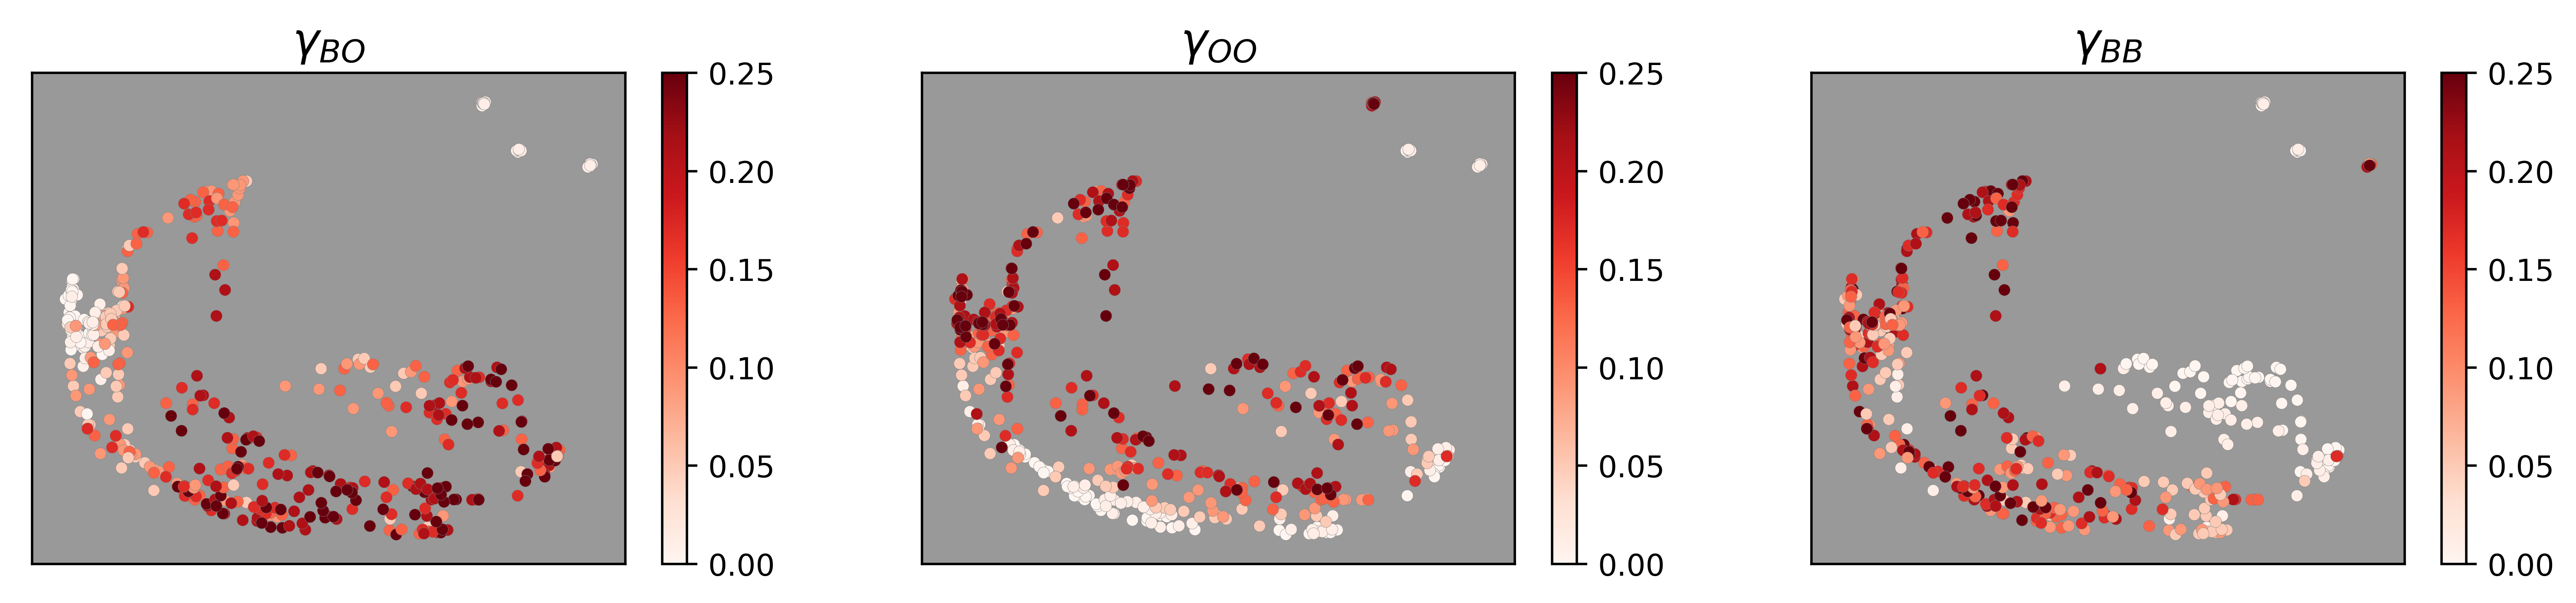

In [16]:
dim_reduction_plot(H0_phate[:, 0], H0_phate[:, 1], H0_grnd_truth, 
                   H0_hetero_adh, H0_homo_adh_OO, H0_homo_adh_BB, "PHATE")

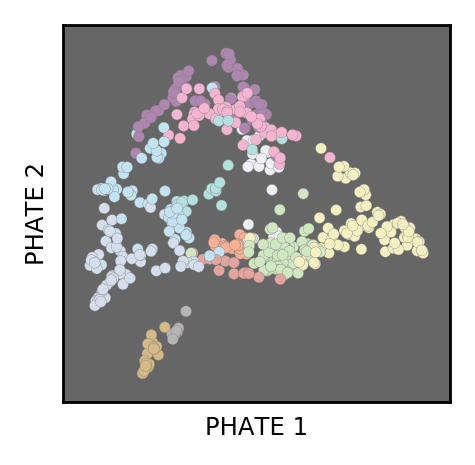

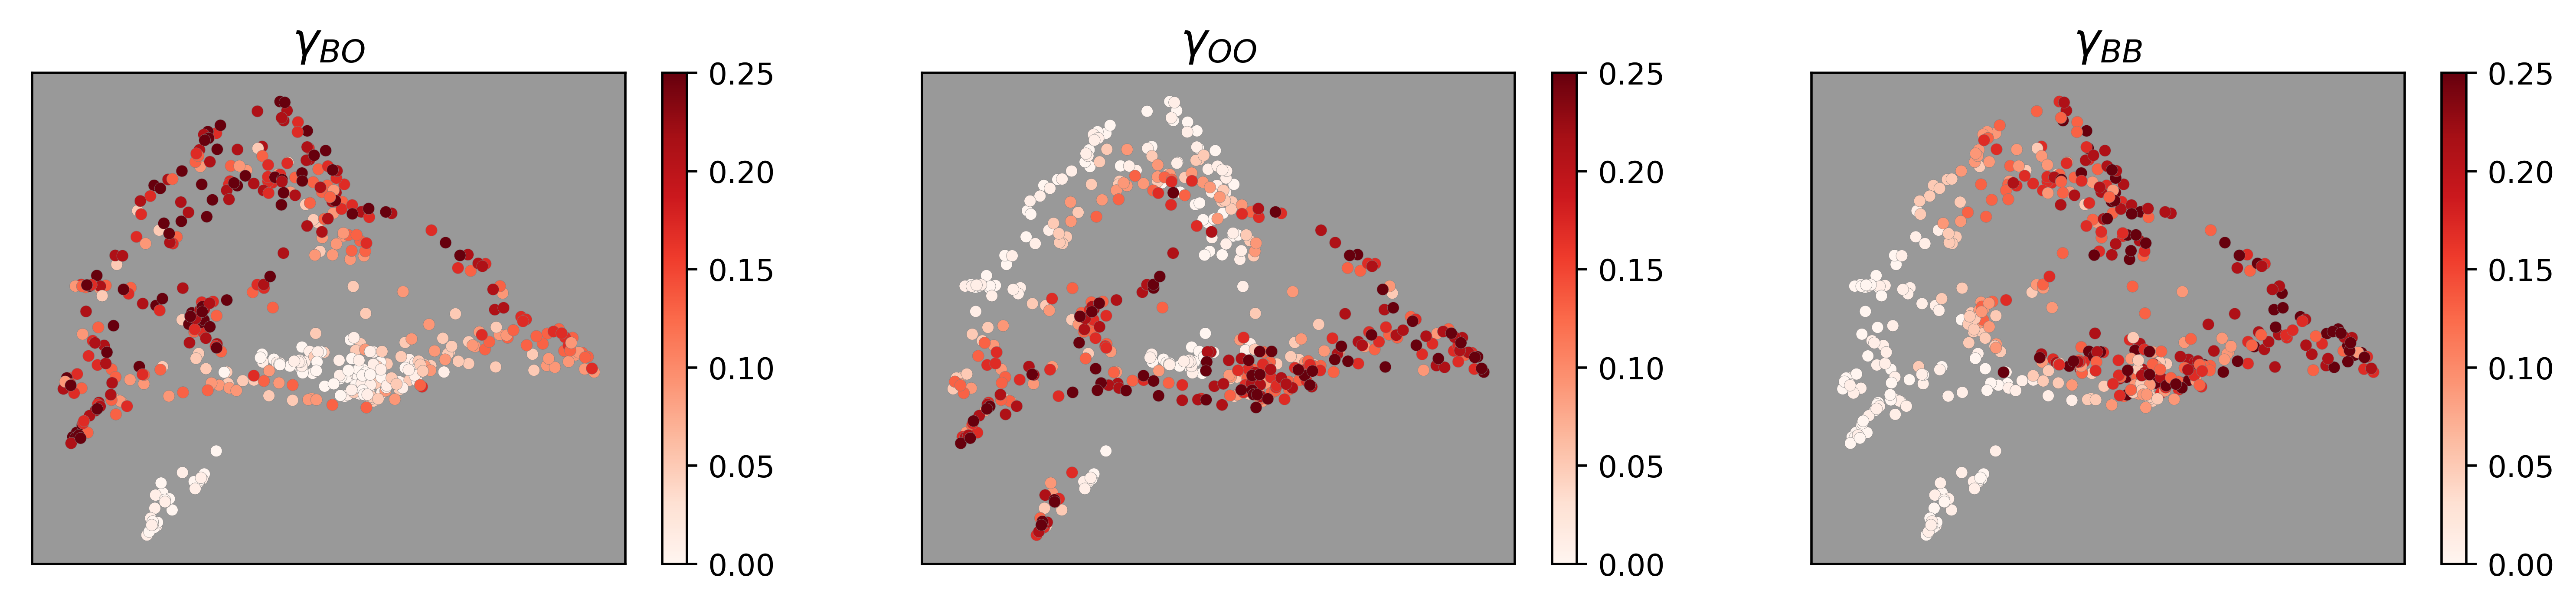

In [17]:
dim_reduction_plot(H1_phate[:, 0], H1_phate[:, 1], H1_grnd_truth, 
                   H1_hetero_adh, H1_homo_adh_OO, H1_homo_adh_BB, "PHATE")

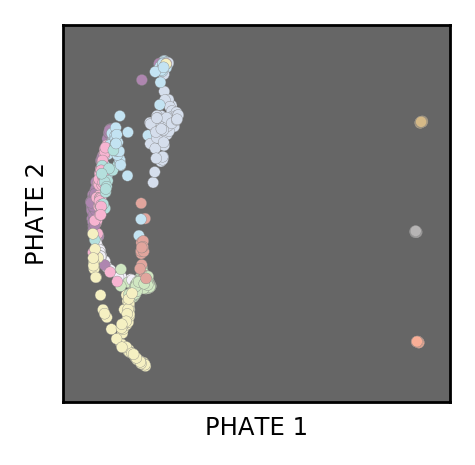

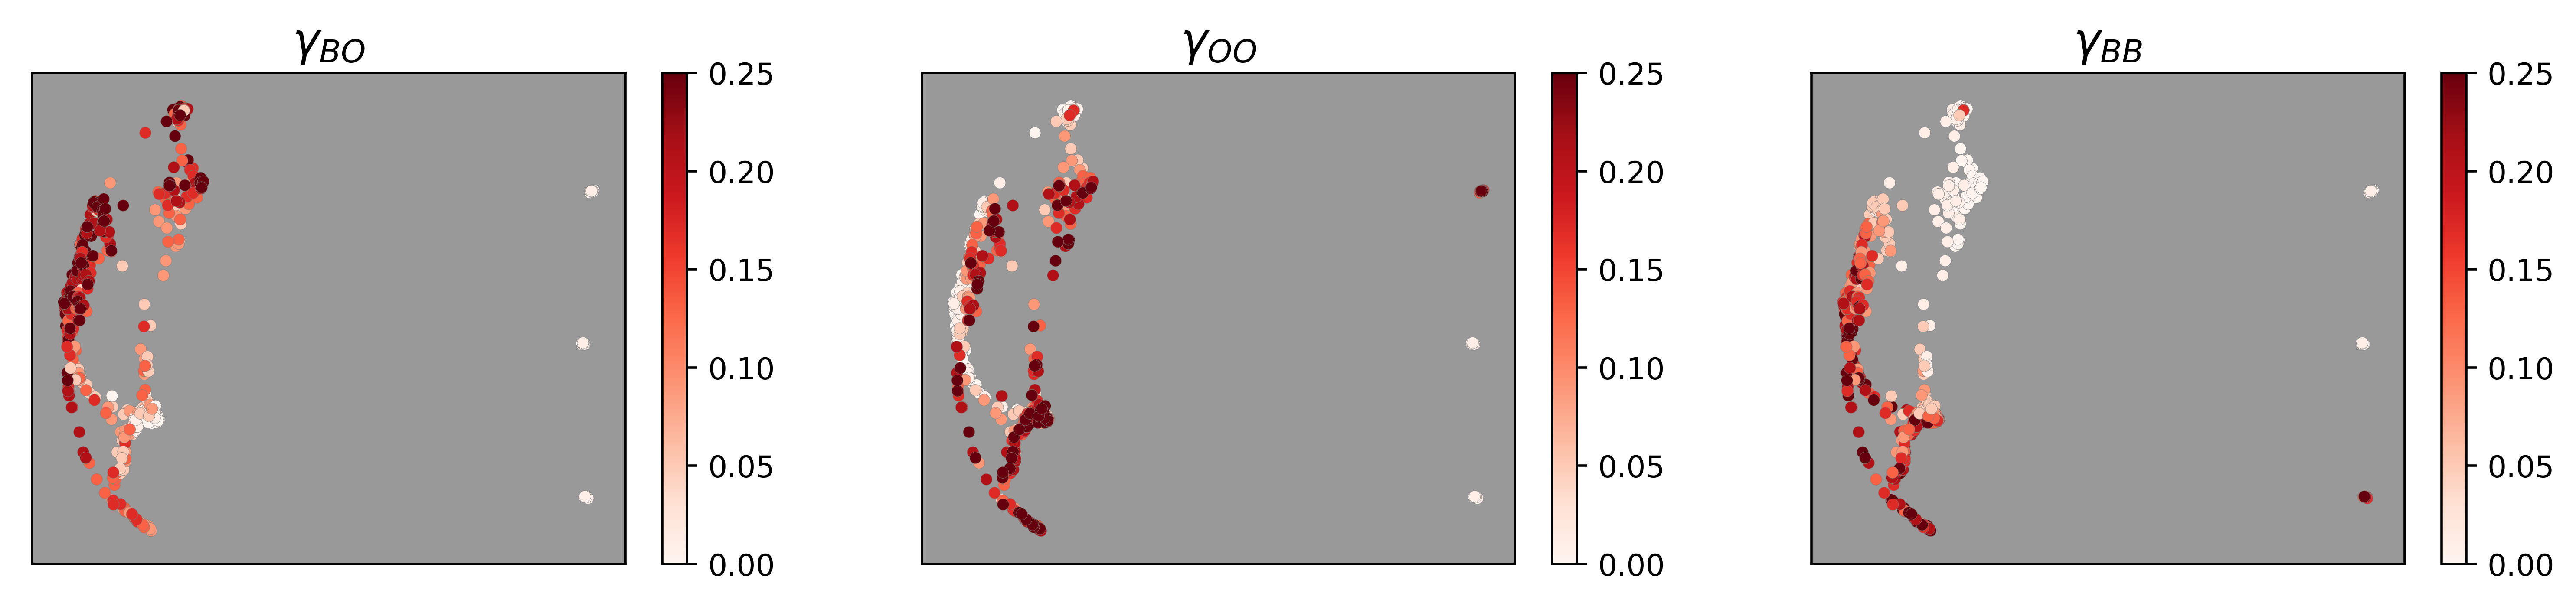

In [18]:
dim_reduction_plot(H01_phate[:, 0], H01_phate[:, 1], H0_grnd_truth, 
                   H0_hetero_adh, H0_homo_adh_OO, H0_homo_adh_BB, "PHATE")

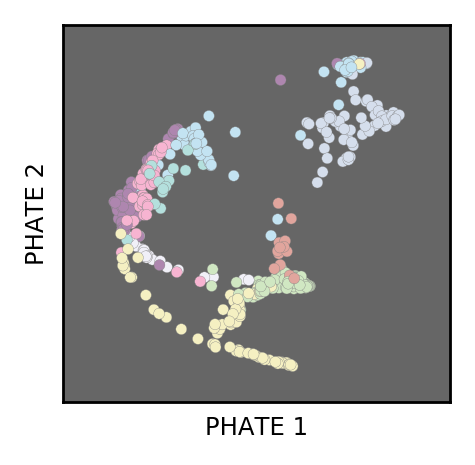

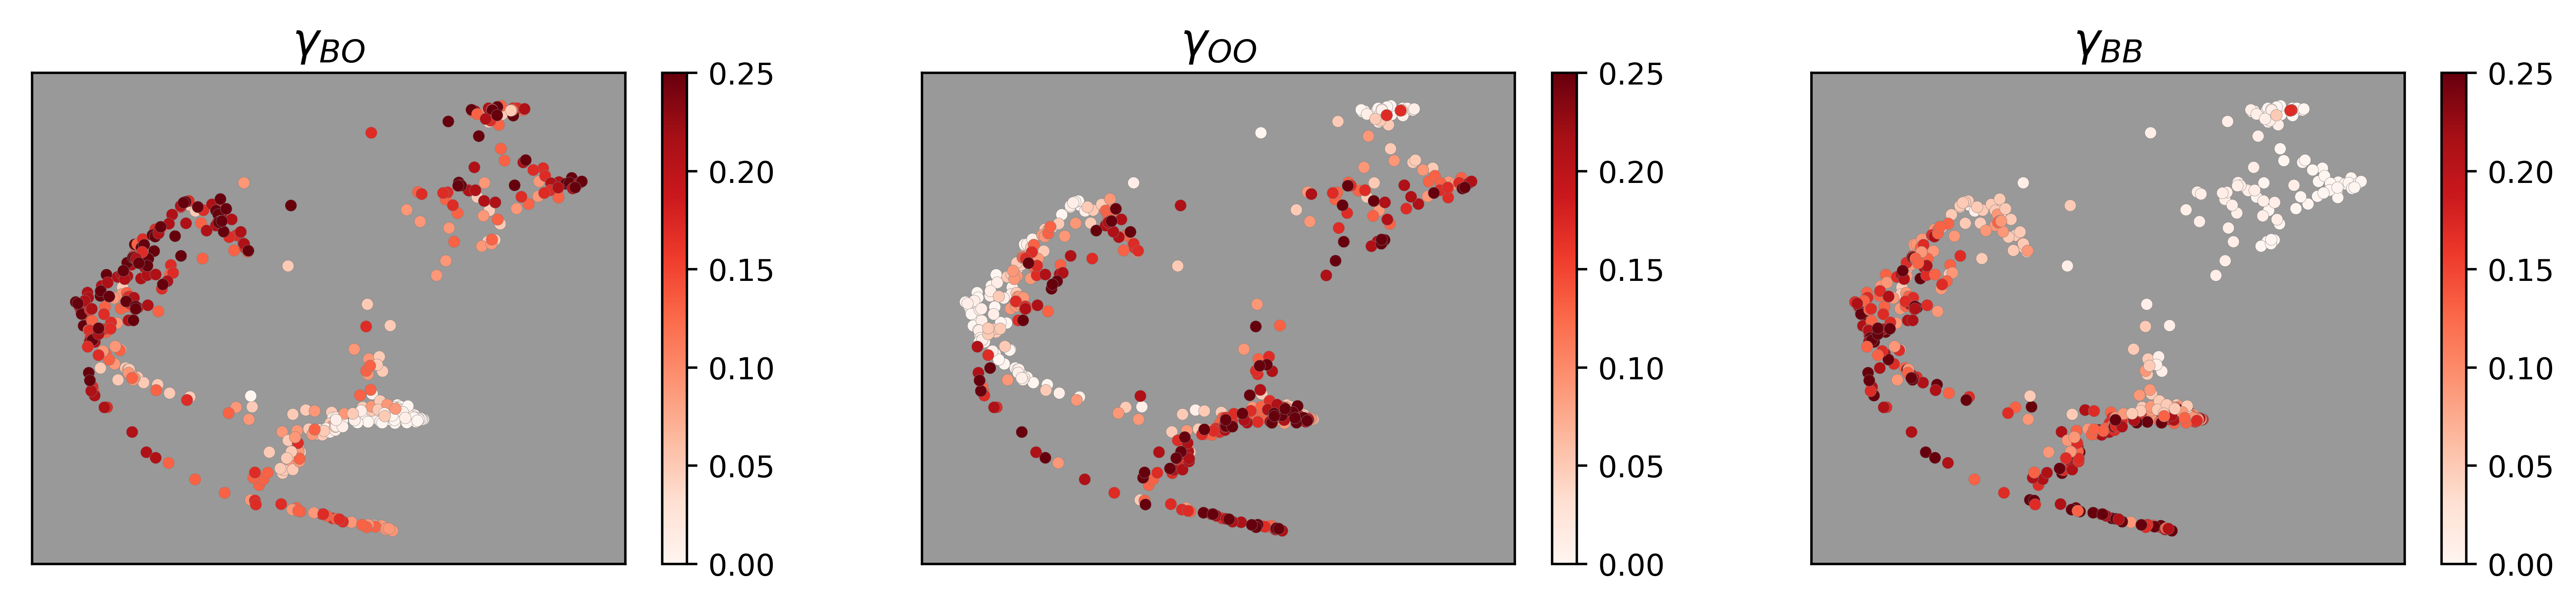

In [19]:
indices = H01_phate[:, 0] < 0.1
H01_collective_X = H01_phate[:, 0][indices]
H01_collective_Y = H01_phate[:, 1][indices]

H01_collective_grnd = []
H0_collective_hetero_adh = []
H0_collective_homo_OO_adh = []
H0_collective_homo_BB_adh = []
for i in range(len(indices)):
    if(indices[i]):
        H01_collective_grnd.append(H0_grnd_truth[i])
        H0_collective_hetero_adh.append(H0_hetero_adh[i])
        H0_collective_homo_OO_adh.append(H0_homo_adh_OO[i])
        H0_collective_homo_BB_adh.append(H0_homo_adh_BB[i])

dim_reduction_plot(H01_collective_X, H01_collective_Y, H01_collective_grnd, 
                   H0_collective_hetero_adh, H0_collective_homo_OO_adh, H0_collective_homo_BB_adh, "PHATE")

#### PCA

In [20]:
pca = PCA(n_components=2)
H0_pca = pca.fit(vec_imgs_dim0).transform(vec_imgs_dim0)
H1_pca = pca.fit(vec_imgs_dim1).transform(vec_imgs_dim1)
H01_pca = pca.fit(vec_imgs).transform(vec_imgs)

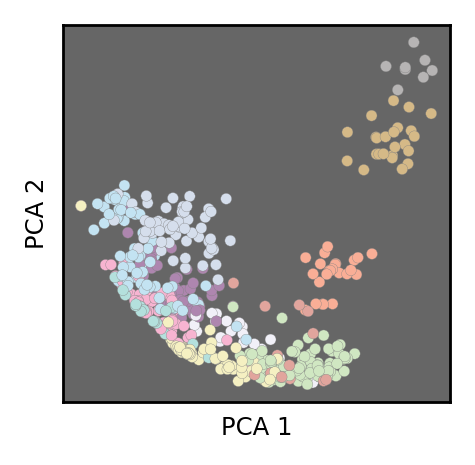

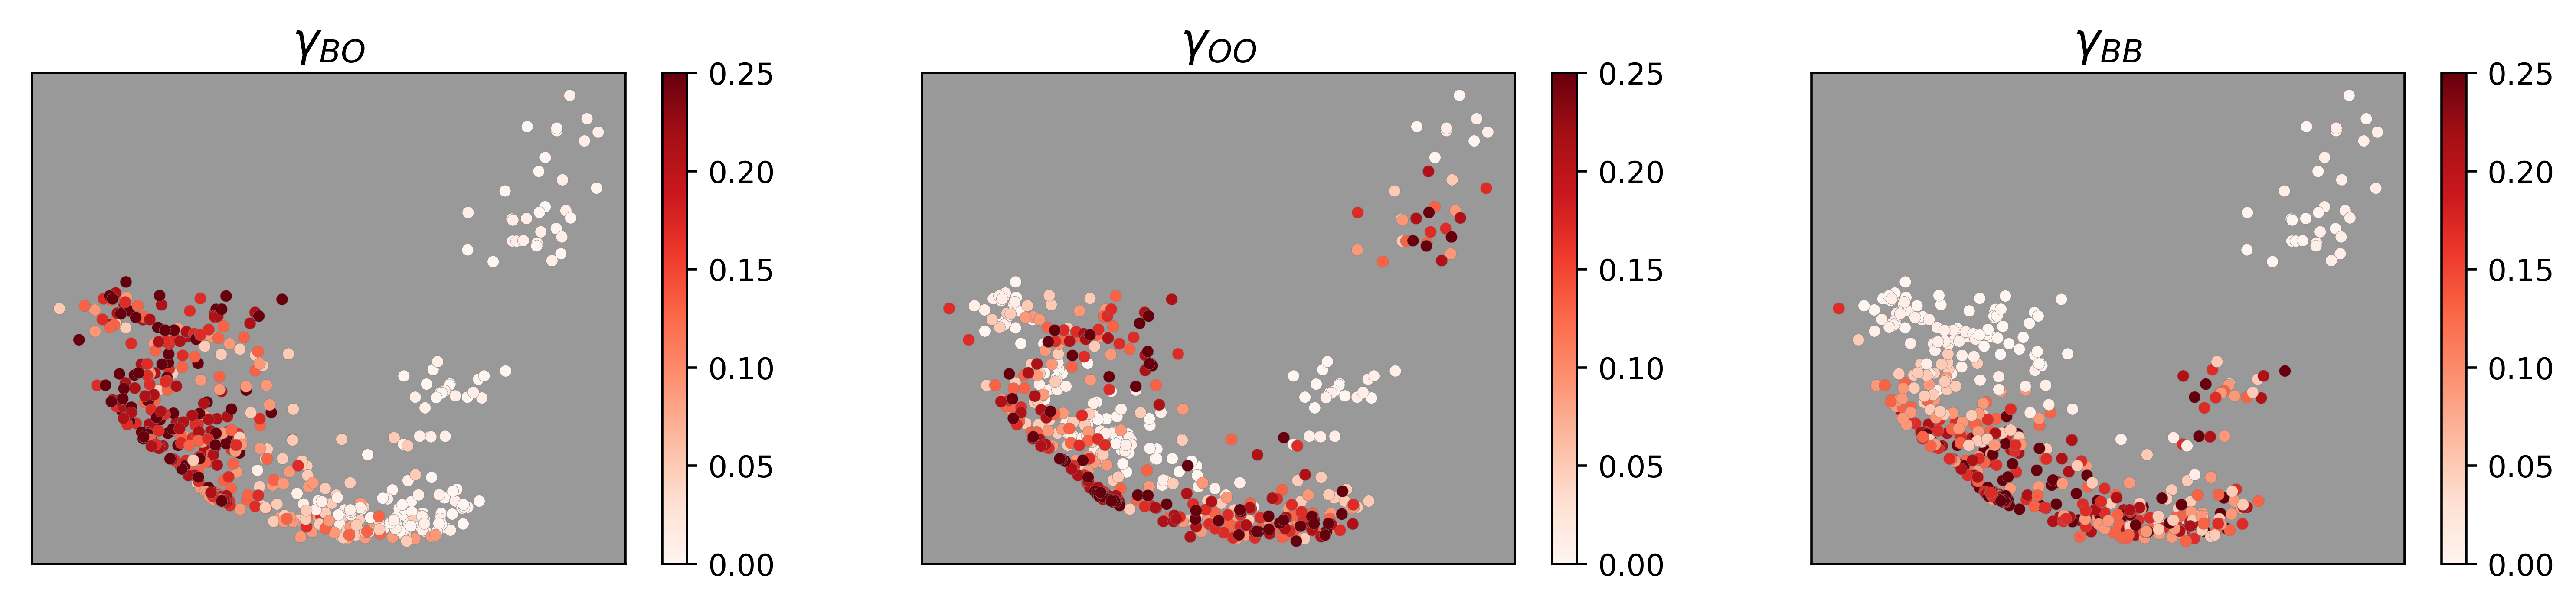

In [21]:
dim_reduction_plot(H0_pca[:, 0], H0_pca[:, 1], H0_grnd_truth, 
                   H0_hetero_adh, H0_homo_adh_OO, H0_homo_adh_BB, "PCA")

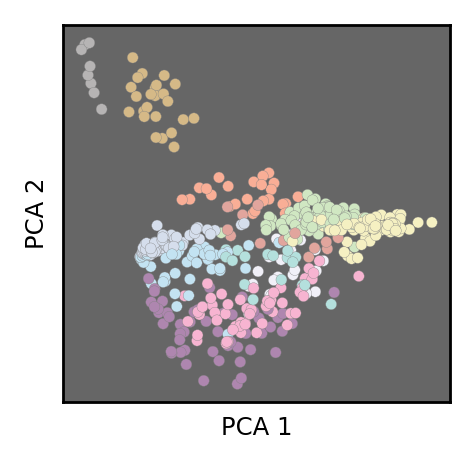

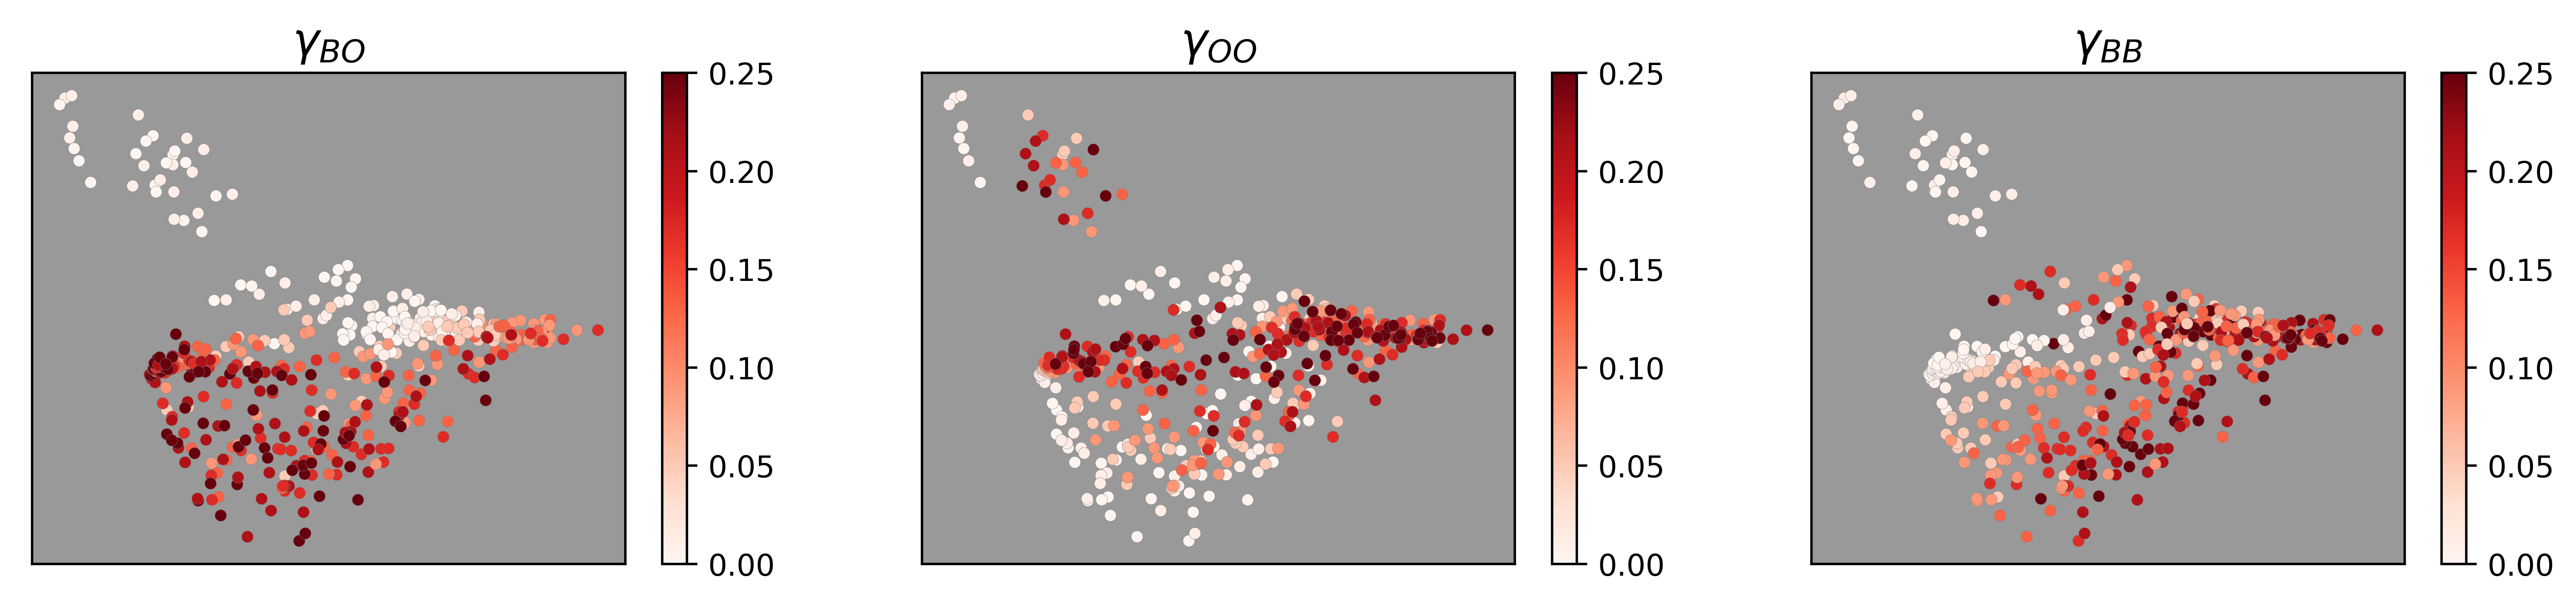

In [22]:
dim_reduction_plot(H1_pca[:, 0], H1_pca[:, 1], H1_grnd_truth, 
                   H1_hetero_adh, H1_homo_adh_OO, H1_homo_adh_BB, "PCA")

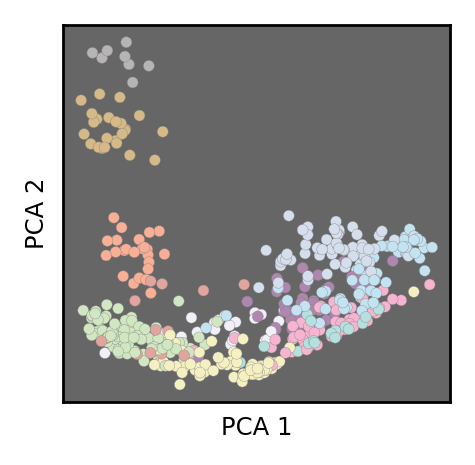

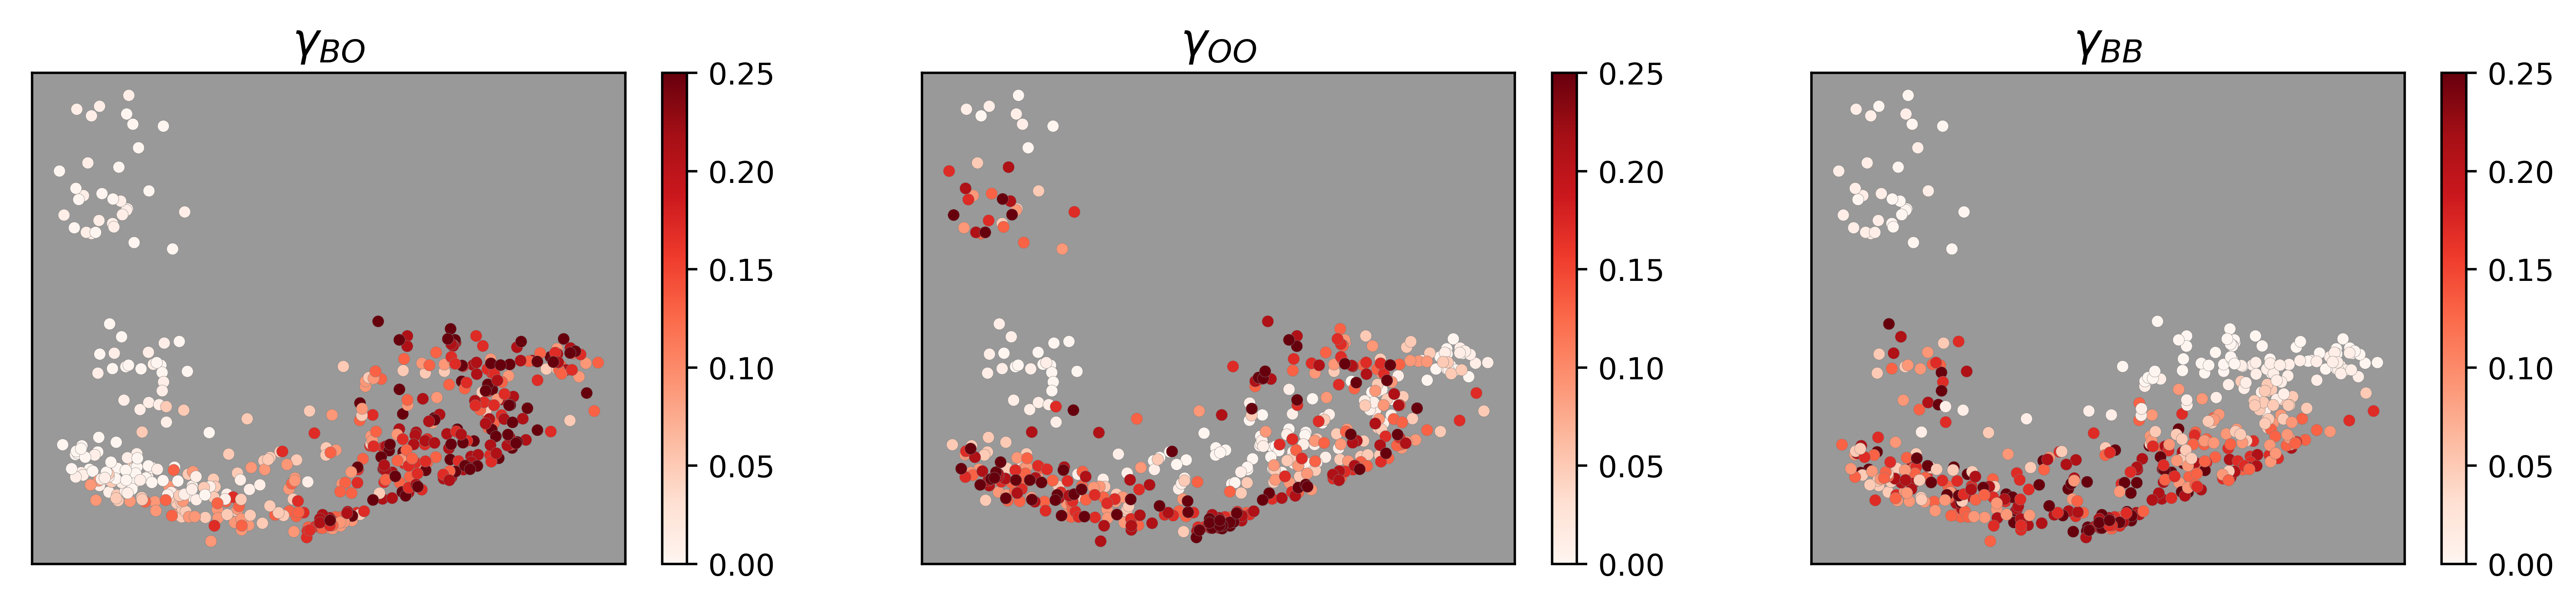

In [23]:
dim_reduction_plot(H01_pca[:, 0], H01_pca[:, 1], H0_grnd_truth, 
                   H0_hetero_adh, H0_homo_adh_OO, H0_homo_adh_BB, "PCA")

#### TODO

- ROC curve, Misclassifications
- Pairwise distance matrices